# Capital Asset Pricing Model (CAPM) 

The capital asset pricing model (CAPM) is a model used to determine a theoretically appropriate required rate of return of an asset, to make decisions about adding assets to a well-diversified portfolio. According to CAPM, the expected returns of a stock are linearly correlated with expected market returns.

The model takes into account the asset's sensitivity to non-diversifiable risk also known as <b> systematic risk or market risk ( $\beta$ )</b> in the financial industry, as well as the expected return of the market and the expected return of a theoretical risk-free asset.


Mathematically, the expected return of a particular investment $E[r_{a}]$ is given the following equation:

$$
E[r_{a}] = r_{f} + \beta_{a}(E[r_{m}]-r_{f})\,
$$


where $r_{f}$ is the a risk free return (like goverment bond returns), $E[r_{m}]$ is the expected return from the market, usually measured by the return on some index like S&P 500, and $\beta_{a}$ measures the volatility of the investement with respect to the market, and is formally given by:
$$
\beta_{a} = \frac{\text{Cov}(r_{a},r_{m})}{\text{Var}(r_{m})}\,
$$

The meaning of $\beta$ is that when the expected market risk-premium increases by
1%, the individual stock's expected return would increase by  $\beta$ %, vice versa. Thus,
beta (market risk) could be viewed as an amplifier. The average beta of all stocks is
one. Thus, if a stock's beta is higher than 1, it means that its market risk is higher than
that of an average stock.


Thus, the model assumes a linear relationship between $E[r_{a}]$ and the quantity $(E[r_{m}]-r_{f})$, also called as the <b>market premium</b>, which is mediated by the coefficient $\beta_{a}$. If we would like to measure all the returns in the model with respect to the risk free rate $r_{f}$ and thus construct a linear regression between the quantities $(E[r_{a}]-r_{f})$ and the market premium $(E[r_{a}]-r_{f})$, one must the pose this relationship as:


$$
(E[r_{a}]-r_{f}) = \alpha + \beta_{a}(E[r_{m}]-r_{f})\,.
$$


In this manner, $\alpha$ meassures the difference between the expected return $E[r_{a}]$ as measured in real life, and the expected return of our investment as given by the CAPM:


$$
\alpha = E[r_{a}] - \left( r_{f} +\beta_{a}(E[r_{m}]-r_{f})\right)\,.
$$


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

We will use  S&P 500 (ticker: ^GSPC) to compute $E[r_{m}]$ and set $r_f = 0 $, for simplicity. Let us then apply the CAPM to IBM stocks. To capture less noise in our construction, we will focus on monthly returns. 

In [2]:
import yfinance as yf
data1, data2 = yf.Ticker("IBM"), yf.Ticker('^GSPC')
ibm, sp = data1.history(period = "10y",rounding=2), data2.history(period = "10y",rounding=2)
ibm

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-02-06,128.54,129.39,128.22,128.77,3807231,0.000000,0.0
2012-02-07,128.52,129.65,128.20,129.12,3590918,0.000000,0.0
2012-02-08,129.24,129.78,128.54,129.36,3978775,0.717017,0.0
2012-02-09,129.41,130.37,129.09,129.48,4054714,0.000000,0.0
2012-02-10,128.56,129.01,128.24,129.00,3547091,0.000000,0.0
...,...,...,...,...,...,...,...
2022-01-31,134.09,134.09,132.30,133.57,5859000,0.000000,0.0
2022-02-01,133.76,135.96,132.50,135.53,6206400,0.000000,0.0
2022-02-02,135.70,137.56,135.26,137.25,5357200,0.000000,0.0


In [3]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-02-06,1344.32,1344.36,1337.52,1344.33,3379700000,0,0
2012-02-07,1344.33,1349.24,1335.92,1347.05,3742460000,0,0
2012-02-08,1347.04,1351.00,1341.95,1349.96,4096730000,0,0
2012-02-09,1349.97,1354.32,1344.63,1351.95,4209890000,0,0
2012-02-10,1351.21,1351.21,1337.35,1342.64,3877580000,0,0
...,...,...,...,...,...,...,...
2022-01-31,4431.79,4516.89,4414.02,4515.55,4001950000,0,0
2022-02-01,4519.57,4550.49,4483.53,4546.54,3796450000,0,0
2022-02-02,4566.39,4595.31,4544.32,4589.38,3777170000,0,0


##### only consider the close price 

In [4]:
data_a, data_m   = ibm['Close'], sp['Close']
data_a.head(5), data_m.head(5)

(Date
 2012-02-06    128.77
 2012-02-07    129.12
 2012-02-08    129.36
 2012-02-09    129.48
 2012-02-10    129.00
 Name: Close, dtype: float64,
 Date
 2012-02-06    1344.33
 2012-02-07    1347.05
 2012-02-08    1349.96
 2012-02-09    1351.95
 2012-02-10    1342.64
 Name: Close, dtype: float64)

##### We focus now on  monthly returns 

In [5]:
M_stock_a, M_stock_m = data_a.resample('M').last(), data_m.resample('M').last()
M_stock_a.head(5), M_stock_m.head(5)

(Date
 2012-02-29    131.89
 2012-03-31    139.88
 2012-04-30    138.83
 2012-05-31    129.86
 2012-06-30    131.67
 Freq: M, Name: Close, dtype: float64,
 Date
 2012-02-29    1365.68
 2012-03-31    1408.47
 2012-04-30    1397.91
 2012-05-31    1310.33
 2012-06-30    1362.16
 Freq: M, Name: Close, dtype: float64)

In [6]:
data = pd.DataFrame({'IBM':M_stock_a, 'SP': M_stock_m})
data.head()

,IBM,SP
Date,,
2012-02-29,131.89,1365.68
2012-03-31,139.88,1408.47
2012-04-30,138.83,1397.91
2012-05-31,129.86,1310.33
2012-06-30,131.67,1362.16


##### calculate log returns

In [7]:
data['IBM_log'] = data.IBM.pct_change()
data['SP_log'] = data.SP.pct_change()
#data[['IBM_log','SP_log']] = np.log(data[['IBM','SP']]/data[['IBM','SP']].shift(1))
data.dropna(inplace=True)
data.head()

,IBM,SP,IBM_log,SP_log
Date,,,,
2012-03-31,139.88,1408.47,0.060581,0.031332
2012-04-30,138.83,1397.91,-0.007506,-0.007497
2012-05-31,129.86,1310.33,-0.064611,-0.062651
2012-06-30,131.67,1362.16,0.013938,0.039555
2012-07-31,131.94,1379.32,0.002051,0.012598


##### The scatter plot of returns

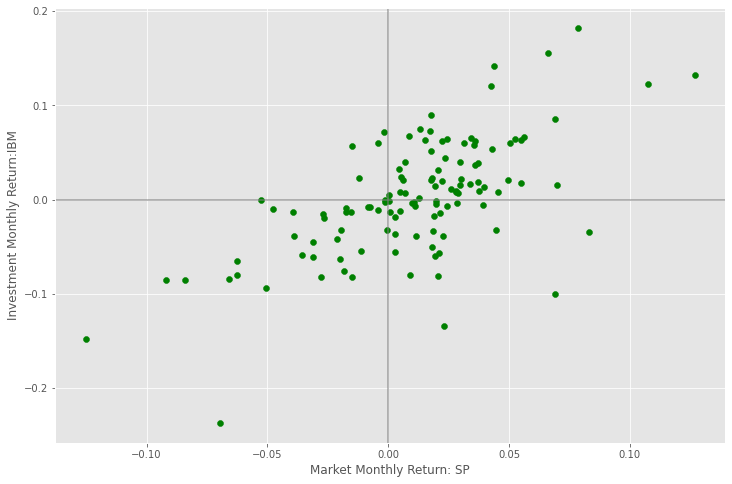

In [8]:
plt.figure(figsize = (12,8))
plt.axvline(0, color='grey', alpha = 0.7)
plt.axhline(0, color='grey', alpha = 0.7)
plt.scatter(y = 'IBM_log', x = 'SP_log', data = data, c='g' )
plt.xlabel('Market Monthly Return: SP')
plt.ylabel('Investment Monthly Return:IBM')
plt.show()

##### compute  $\beta$ according to the CAPM formula

In [9]:
beta_form = (data[['IBM_log','SP_log']].cov()/data['SP_log'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ',beta_form.round(4))

Beta from CAPM formula:  1.0474


##### Now, with our returns data, we make a linear regression and compute $\alpha$ and $\beta$:

In [10]:
beta_reg, alpha = np.polyfit(x = data['SP_log'] , y = data['IBM_log'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))

Beta from Linear Regression:  1.0474
Alpha:  -0.009


##### Finally, we plot our returns scatter plot along with the CAPM line:

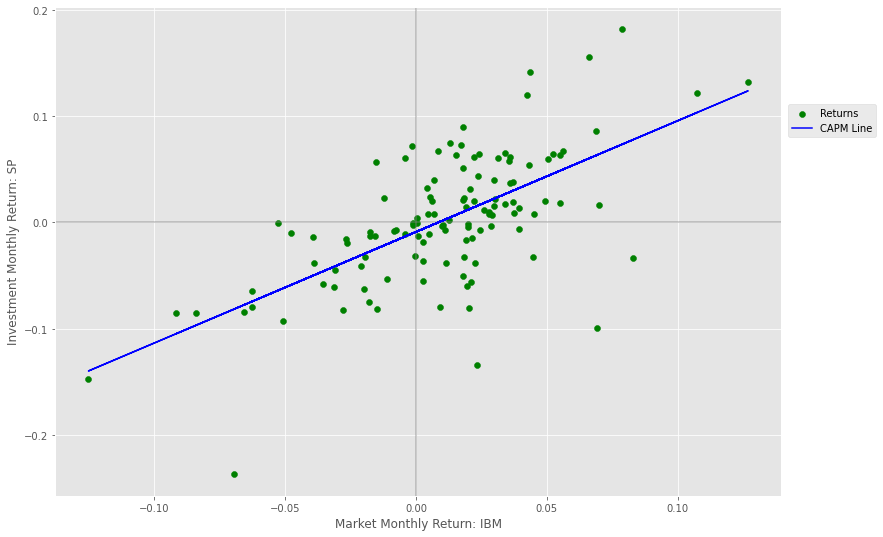

In [11]:
plt.figure(figsize = (13,9))
plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)
plt.scatter(y = 'IBM_log', x = 'SP_log', data = data, c='g', label= "Returns" )
plt.plot(data['SP_log'], alpha + data['SP_log']*beta_reg, color = 'b', label = 'CAPM Line')
plt.xlabel('Market Monthly Return: IBM')
plt.ylabel('Investment Monthly Return: SP')
plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)
plt.show()

# ==========================================

##### define a single function that gives us $\alpha$, $\beta$ and the corresponding plot. 

In [12]:
def CAPM_Monthly(stock_a,stock_m, period):
    
    data1, data2 = yf.Ticker(stock_a[0]), yf.Ticker(stock_m[0])
    asset, mrkt = data1.history(period = period,rounding=2), data2.history(period = period,rounding=2)    
    data_a, data_m   = asset['Close'], mrkt['Close']    
    
    # monthly returns
    M_stock_a = data_a.resample('M').last()
    M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))   
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)
    plt.scatter(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    plt.plot(data['Markt_Ret'], alpha + data['Markt_Ret']*beta_reg, color = 'b', label = 'CAPM Line')
    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)
    plt.show()   



Beta from formula:  1.0589
Beta from Linear Regression:  1.0589
Alpha:  -0.01


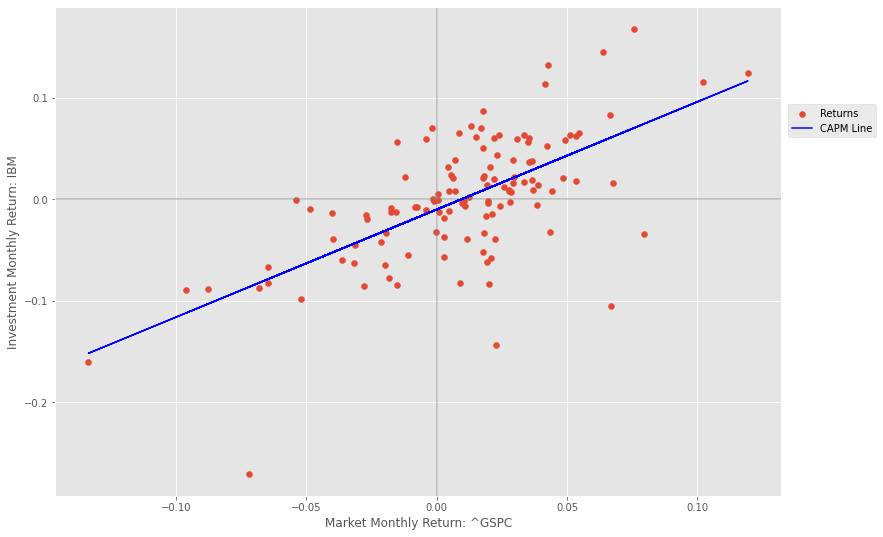

In [15]:
stock_a =['IBM']
stock_m = ['^GSPC']
period = '10y'
CAPM_Monthly(stock_a,stock_m,period)

In [18]:
def CAPM_daily(stock_a,stock_m, period):    
    data1, data2 = yf.Ticker(stock_a[0]), yf.Ticker(stock_m[0])
    asset, mrkt = data1.history(period = period,rounding=2), data2.history(period = period,rounding=2)    
    data_a, data_m   = asset['Close'], mrkt['Close']
    M_stock_a, M_stock_m = data_a, data_m        
    data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)    
    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1) 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(5))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')    
    plt.figure(figsize = (13,9))    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)
    plt.scatter(y = 'Inv_Ret', x = 'Markt_Ret', data = data, color = 'g', label = 'Returns')
    plt.plot(data['Markt_Ret'], alpha + data['Markt_Ret']*beta_reg, color = 'b', label = 'CAPM Line')
    plt.xlabel('Market daily Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment daily Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)
    plt.show()



Beta from formula:  0.91125
Beta from Linear Regression:  0.9112
Alpha:  -0.0


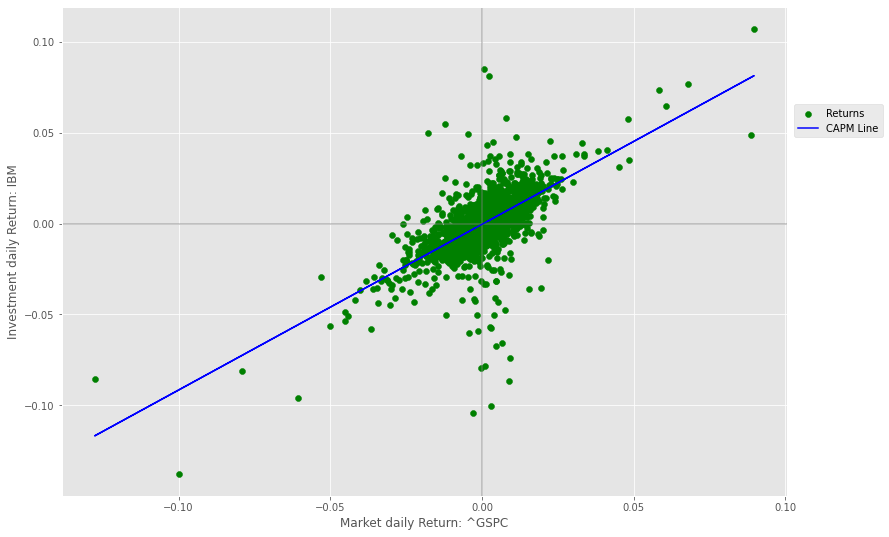

In [19]:
stock_a =['IBM']
stock_m = ['^GSPC']
period = '10y'
CAPM_daily(stock_a,stock_m,period)

### Statistical Analysis of CAPM

In [20]:
import statsmodels.api as sm
import yfinance as yf
data1, data2 = yf.Ticker("IBM"), yf.Ticker('^GSPC')
ibm, sp = data1.history(period = "10y",rounding=2), data2.history(period = "10y",rounding=2)
ibm.head(5), sp.head(5)

c:\python3.9\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


(              Open    High     Low   Close   Volume  Dividends  Stock Splits
 Date                                                                        
 2012-02-06  128.54  129.39  128.22  128.77  3807231   0.000000           0.0
 2012-02-07  128.52  129.65  128.20  129.12  3590918   0.000000           0.0
 2012-02-08  129.24  129.78  128.54  129.36  3978775   0.717017           0.0
 2012-02-09  129.41  130.37  129.09  129.48  4054714   0.000000           0.0
 2012-02-10  128.56  129.01  128.24  129.00  3547091   0.000000           0.0,
                Open     High      Low    Close      Volume  Dividends  \
 Date                                                                    
 2012-02-06  1344.32  1344.36  1337.52  1344.33  3379700000          0   
 2012-02-07  1344.33  1349.24  1335.92  1347.05  3742460000          0   
 2012-02-08  1347.04  1351.00  1341.95  1349.96  4096730000          0   
 2012-02-09  1349.97  1354.32  1344.63  1351.95  4209890000          0   
 2012-02-

In [21]:
ibm_ret = ibm.Close.pct_change()
ibm_ret = ibm_ret.dropna()
sp_ret = sp.Close.pct_change()
sp_ret = sp_ret.dropna()
results = sm.OLS(ibm_ret, sp_ret).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.428
Method:                 Least Squares   F-statistic:                              1883.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                   1.51e-307
Time:                        17:25:59   Log-Likelihood:                          7802.5
No. Observations:                2517   AIC:                                 -1.560e+04
Df Residuals:                    2516   BIC:                                 -1.560e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
from scipy import stats
(beta, alpha, r_value,p_value,std_err)=stats.linregress(sp_ret, ibm_ret)
beta, alpha, r_value,p_value,std_err

(0.9115368650432355,
 -0.0003563295426909452,
 0.6546570093541497,
 5.765809957232515e-308,
 0.020987984511449422)